# Lab 8 - fMNIST Classification with Dense Neural Networks (using Tensorflow)

In [64]:
# Import Packages 
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

## Get Data  


Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.  


Source: [Kaggle](https://www.kaggle.com/code/abhishekyana/fmnist-dataset-with-cnns-tensorflow/notebook)

In [65]:
# Read dataset
train_df = pd.read_csv('data/fashion-mnist_train.csv')
test_df = pd.read_csv('data/fashion-mnist_test.csv')

# Convert to numpy
train_data = train_df.to_numpy(dtype=np.uint8)
test_data = test_df.to_numpy(dtype=np.uint8)

# Convert labels and images
train_labels = train_data[:, 0]
train_images = train_data[:, 1:].reshape(-1, 28, 28)
test_labels = test_data[:, 0]
test_images = test_data[:, 1:].reshape(-1, 28, 28)


## Explore Data

In [66]:
print(f'Image DType: {type(train_images)}')
print(f'Image Element DType: {type(train_images[0,0,0])}')
print(f'Label Element DType: {type(train_labels[0])}')
print('**Shapes:**')
print('Train Data:')
print(f'Images: {train_images.shape}')
print(f'Labels: {train_labels.shape}')
print('Test Data:')  # the text images should be a random sample of the overall test set, and hence should have the same type, shape and image-size as the overall train set
print(f'Images: {test_images.shape}')
print(f'Labels: {test_labels.shape}')
print('Image Data Range:')
print(f'Min: {train_images.min()}')
print(f'Max: {train_images.max()}')

Image DType: <class 'numpy.ndarray'>
Image Element DType: <class 'numpy.uint8'>
Label Element DType: <class 'numpy.uint8'>
**Shapes:**
Train Data:
Images: (60000, 28, 28)
Labels: (60000,)
Test Data:
Images: (10000, 28, 28)
Labels: (10000,)
Image Data Range:
Min: 0
Max: 255


## Visualize the training images

Source: [EDA-Training](https://dax-nb-preview-prod.s3.us.cloud-object-storage.appdomain.cloud/fashion-mnist/Part%201%20-%20Data%20Exploration.html)

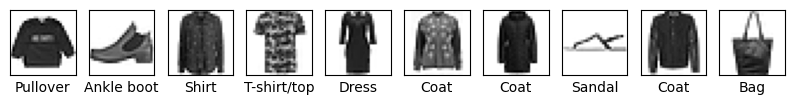

In [67]:
# Display some images with labels
def display_images(images, labels, num_images=10):
    plt.figure(figsize=(10,10), facecolor='white')
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(labels[i])
    plt.show()

# Display the first 10 images and labels
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
display_images(train_images, [label_names[int(label)] for label in train_labels[:10]], 10)

## Class Distribution 

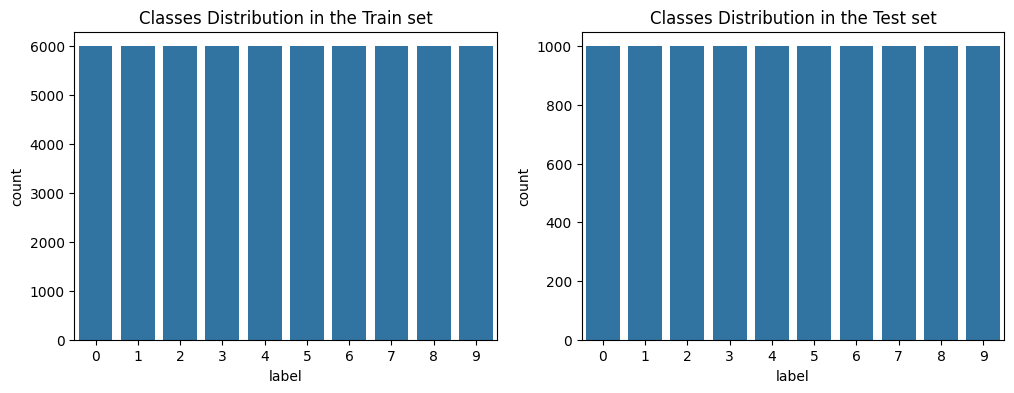

In [68]:
f, ax = plt.subplots(1,2, figsize=(12,4))
g1 = sns.countplot(data=train_df, x='label', ax=ax[0])
g2 = sns.countplot(data=test_df, x='label', ax=ax[1])

g1.set_title("Classes Distribution in the Train set")
g2.set_title("Classes Distribution in the Test set")
plt.show()  

## Preprocessing the Data

In [69]:
# Preprocess the data
train_images = train_images / 255.0
train_labels = to_categorical(train_labels)
test_images = test_images / 255.0
test_labels = to_categorical(test_labels)

## Split Train Data into train and validation

In [70]:
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

## Define and Compile Model

In [71]:
# Define the model
models = []

# Model 1: Original model
model_1 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
models.append(('Model 1', model_1))

## Train Model

In [72]:
model_1.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5220 - accuracy: 0.8179 - val_loss: 0.4136 - val_accuracy: 0.8520
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3958 - accuracy: 0.8578 - val_loss: 0.3767 - val_accuracy: 0.8649
Epoch 3/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3584 - accuracy: 0.8708 - val_loss: 0.3752 - val_accuracy: 0.8638
Epoch 4/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3329 - accuracy: 0.8780 - val_loss: 0.3601 - val_accuracy: 0.8717
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3099 - accuracy: 0.8872 - val_loss: 0.3426 - val_accuracy: 0.8741
Epoch 6/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2954 - accuracy: 0.8911 - val_loss: 0.3388 - val_accuracy: 0.8724
Epoch 7/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2790 - accuracy: 0.8977 - val_loss: 0.3223 - val_accuracy:

## Model Prediction and Evaluate on Validation set

In [73]:
# Evaluate the model on the validation set
val_loss, val_acc = model_1.evaluate(X_val, y_val, verbose=2)

# Predictions on the test set
val_predictions = model_1.predict(X_val)
val_predictions_labels = np.argmax(val_predictions, axis=1)
val_true_labels = np.argmax(y_val, axis=1)

# Evaluation metrics
val_precision = precision_score(val_true_labels, val_predictions_labels, average='macro')
val_recall = recall_score(val_true_labels, val_predictions_labels, average='macro')
val_f1 = f1_score(val_true_labels, val_predictions_labels, average='macro')

# Print results
print(f'Validation Accuracy: {val_acc:.4f}')
print(f'Validation Precision: {val_precision:.4f}')
print(f'Validation Recall: {val_recall:.4f}')
print(f'Validation F1 Score: {val_f1:.4f}')

375/375 - 0s - loss: 0.3241 - accuracy: 0.8889 - 338ms/epoch - 900us/step
375/375 [==============================] - 0s 803us/step
Validation Accuracy: 0.8889
Validation Precision: 0.8903
Validation Recall: 0.8900
Validation F1 Score: 0.8892


## Model Prediction and Evaluate on Test set

In [74]:
# Predictions on the test set
test_predictions = model_1.predict(test_images)
test_predictions_labels = np.argmax(test_predictions, axis=1)
test_true_labels = np.argmax(test_labels, axis=1)

# Evaluation metrics
test_accuracy = accuracy_score(test_true_labels, test_predictions_labels)
test_precision = precision_score(test_true_labels, test_predictions_labels, average='macro')
test_recall = recall_score(test_true_labels, test_predictions_labels, average='macro')
test_f1 = f1_score(test_true_labels, test_predictions_labels, average='macro')

# Print results
print(f'Validation Accuracy: {val_acc:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Precision: {test_precision:.4f}')
print(f'Test Recall: {test_recall:.4f}')
print(f'Test F1 Score: {test_f1:.4f}')

313/313 [==============================] - 0s 786us/step
Validation Accuracy: 0.8889
Test Accuracy: 0.8883
Test Precision: 0.8881
Test Recall: 0.8883
Test F1 Score: 0.8874


Based on the result we got here, we can conclude that the performance of the model is great as the accuracy is close to 88% and it effectively predicts each class labels. The value of precision and recall also shows the balance trade off between minimizing false positive and false negatives. Overall, the model appears reliable.

## Increase precision for class '5'  

This can be accomplished by adjusting threshold value to get the desired precision value but by doing this it will be effecting recall.  

In [75]:
# Get the probabilities for class '5' from the validation set predictions
val_predictions = model_1.predict(X_val)
val_predictions_class5 = val_predictions[:, 5]  

# Set the threshold
threshold = 0.5  

val_predictions_class5_thresholded = (val_predictions_class5 > threshold).astype(int)
val_true_labels_class5 = y_val[:, 5]

# Calculate precision for class '5'
val_precision_class5 = precision_score(val_true_labels_class5, val_predictions_class5_thresholded)

print(f'Validation Precision for class 5: {val_precision_class5:.4f}')

375/375 [==============================] - 0s 762us/step
Validation Precision for class 5: 0.9616


## Increase the recall for class '5'  

Lowering the threshold will potentially increase the recall for class 5.

In [76]:
# Get the probabilities for class '5' from the validation set predictions
val_probabilities_class5 = val_predictions[:, 5]

# Set a lower threshold to increase recall for class '5'
threshold = 0.3 
val_predictions_class5 = (val_probabilities_class5 > threshold).astype(int)
val_true_labels_class5 = y_val[:, 5]

# Calculate recall for class '5'
val_recall_class5 = recall_score(val_true_labels_class5, val_predictions_class5)

print(f'Validation Recall for class 5: {val_recall_class5:.4f}')

Validation Recall for class 5: 0.9737


# Lab 9 - Avoiding Overfitting by Saving a Model

## Comparison of Three Neural Networks with Varying Hyperparameters

In [77]:
# Model 2: Increase the number of neurons in the first Dense layer
model_2 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'), # Increased neurons
    Dense(10, activation='softmax')
])
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
models.append(('Model 2', model_2))

# Model 3: Add an additional Dense layer
model_3 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'), # Additional layer
    Dense(10, activation='softmax')
])
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
models.append(('Model 3', model_3))

## Training and Validation Performance of Three Neural Network Architectures

In [78]:
checkpoint_filepath = 'best_model.hdf5'  # Filepath where you want to save the model

model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,  # Optionally save only weights instead of the full model
    monitor='val_loss',
    mode='min',  # Monitor validation loss and save on minimum
    save_best_only=True)

# Train each model and record their history
histories = {}
for name, model in models:
    print(f'Training {name}...')
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), verbose=0, callbacks=[model_checkpoint_callback])
    histories[name] = history
    print(f'{name} trained.')

Training Model 1...
Model 1 trained.
Training Model 2...
Model 2 trained.
Training Model 3...
Model 3 trained.



### Model 1

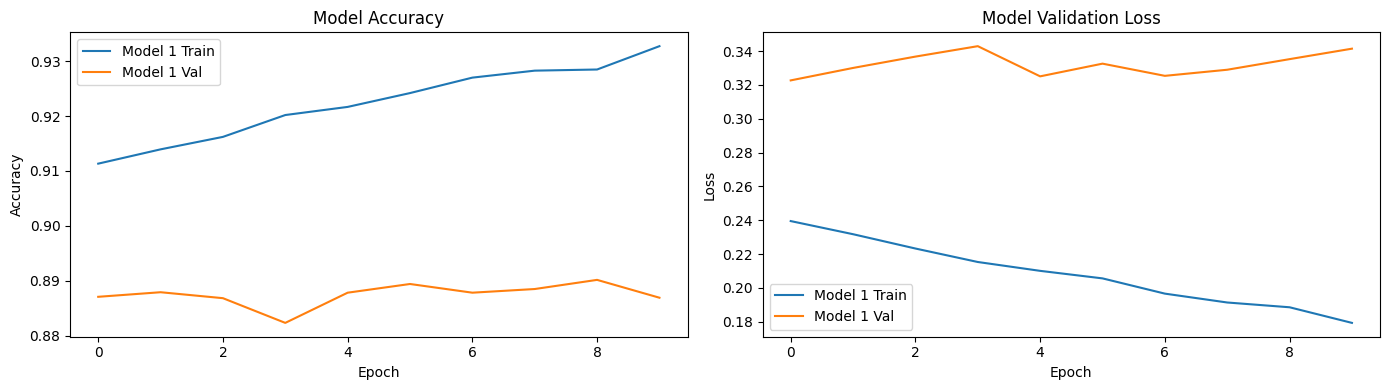

In [79]:
# Plot training & validation accuracy values
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(histories['Model 1'].history['accuracy'], label='Model 1 Train')
plt.plot(histories['Model 1'].history['val_accuracy'], label='Model 1 Val')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(histories['Model 1'].history['loss'], label='Model 1 Train')
plt.plot(histories['Model 1'].history['val_loss'], label='Model 1 Val')
plt.title('Model Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

From the above we can choose epoch 6, as after epoch 6 there is no much fluctuation in plot. So we can conclude that the model have trained well at epoch 6 and thereafter there model will be overfitting.

### Model 2

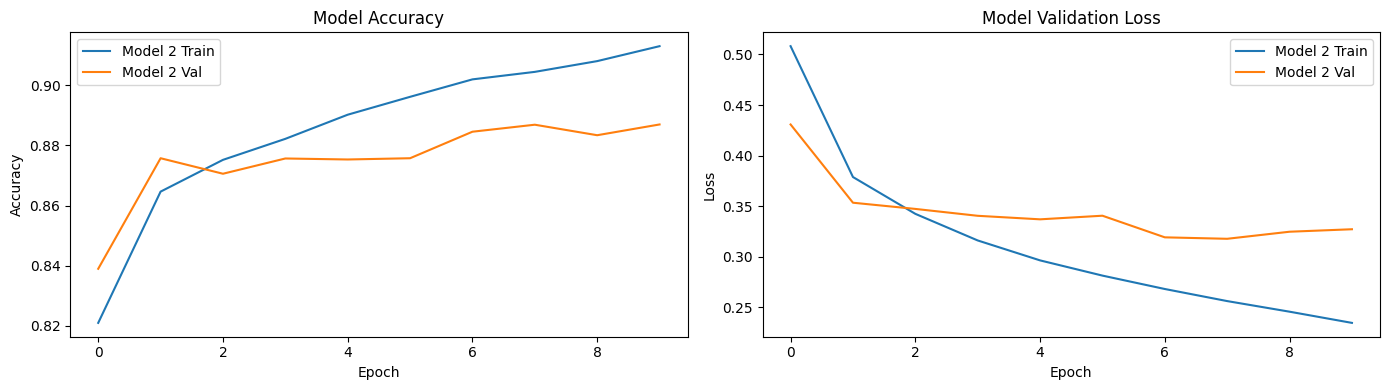

In [80]:
# Plot training & validation accuracy values
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(histories['Model 2'].history['accuracy'], label='Model 2 Train')
plt.plot(histories['Model 2'].history['val_accuracy'], label='Model 2 Val')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(histories['Model 2'].history['loss'], label='Model 2 Train')
plt.plot(histories['Model 2'].history['val_loss'], label='Model 2 Val')
plt.title('Model Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

From the above we can choose epoch 7, as after epoch 7 there is no much fluctuation in plot. So we can conclude that the model have trained well at epoch 7 and thereafter there model will be overfitting.

### Model 3

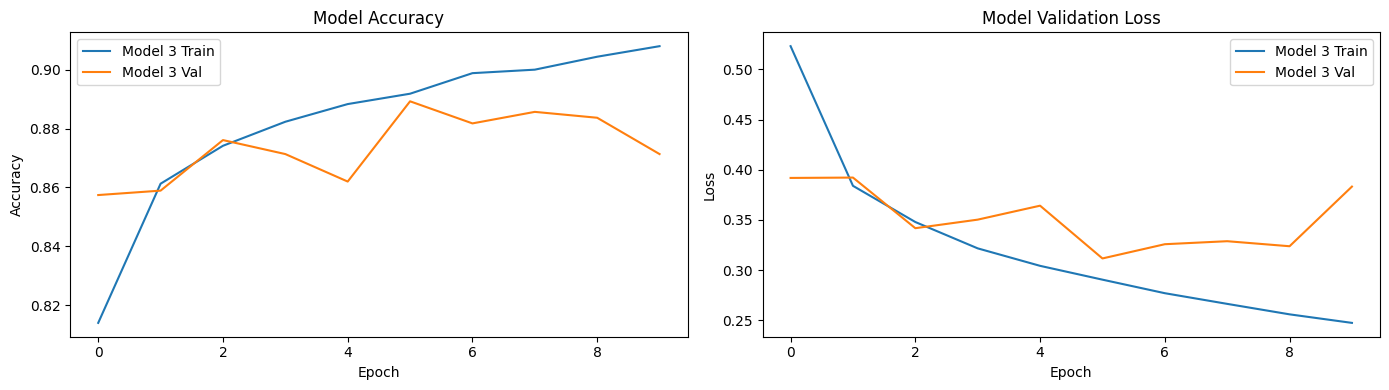

In [81]:
# Plot training & validation accuracy values
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(histories['Model 3'].history['accuracy'], label='Model 3 Train')
plt.plot(histories['Model 3'].history['val_accuracy'], label='Model 3 Val')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(histories['Model 3'].history['loss'], label='Model 3 Train')
plt.plot(histories['Model 3'].history['val_loss'], label='Model 3 Val')
plt.title('Model Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

For this model also we can choose epoch 7, as after epoch 7 there is no much fluctuation in plot. So we can conclude that the model have trained well at epoch 7 and thereafter there model will be overfitting.

## Insights and Reasoning

| Model | Training Accuracy | Validation Accuracy | Training Loss | Validation Loss | Overfitting Indication |
|-------|-------------------|---------------------|---------------|-----------------|------------------------|
|   1   |       High        |         High        |      Low      |       Low       |        Minimal         |
|   2   |     Very High     |         High        |    Very Low   |       Low       |        Moderate        |
|   3   |       High        |       Moderate      |      Low      |     Moderate    |      Significant      |  

*  Model 1, shows a good balance between training and validation accuracy and loss.
*  Model 2, where we increased the number of neurons in the first layer, we see very good results during training, with high accuracy and very low loss. However, these results don't fully carry over to the validation stage.
*  Model 3, which includes an additional Dense layer, exhibits a significant gap between training and validation metrics, indicating that the model is overfitting considerably.

Conclusion, Model 1 appears to be the best set of weights among the three. It maintains a balance between learning from the training data and generalizing to new, unseen data.

## Evaluation of the Best Neural Network Model

In [82]:

best_model = load_model('best_model.hdf5') 

# Evaluate the model on the validation set
val_loss, val_acc = best_model.evaluate(X_val, y_val, verbose=2)

# Predictions on the test set
val_predictions = best_model.predict(X_val)
val_predictions_labels = np.argmax(val_predictions, axis=1)
val_true_labels = np.argmax(y_val, axis=1)

# Evaluation metrics
val_precision = precision_score(val_true_labels, val_predictions_labels, average='macro')
val_recall = recall_score(val_true_labels, val_predictions_labels, average='macro')
val_f1 = f1_score(val_true_labels, val_predictions_labels, average='macro')

# Print results
print(f'Validation Accuracy: {val_acc:.4f}')
print(f'Validation Precision: {val_precision:.4f}')
print(f'Validation Recall: {val_recall:.4f}')
print(f'Validation F1 Score: {val_f1:.4f}')

375/375 - 0s - loss: 0.3116 - accuracy: 0.8892 - 384ms/epoch - 1ms/step
375/375 [==============================] - 0s 756us/step
Validation Accuracy: 0.8892
Validation Precision: 0.8908
Validation Recall: 0.8906
Validation F1 Score: 0.8904


In overall, the model performs well on validation dataset where is a good balance between precision(0.8920) and recall (0.8890). And the accuracy is around 88% which shows the models performance in predicting the unseen data.